In [1]:
import pandas as pd
filename = "train.csv"
data = pd.read_csv(filename)
df = pd.DataFrame(data)
group_click=pd.DataFrame({'Imps':df.groupby('advertiser')['advertiser'].agg('count'),
                           'Bids':df.groupby('advertiser')['bidprice'].sum(),
                           'Cost':df.groupby('advertiser')['payprice'].sum()/1000,
                           'Clicks':df.groupby('advertiser')['click'].sum(),
                           'CTR':df.groupby('advertiser')['click'].sum()/df.groupby('advertiser')['advertiser'].agg('count'),
                           'CPM':df.groupby('advertiser')['payprice'].sum()*1000/(df.groupby('advertiser')['advertiser'].agg('count')*1000),
                           'eCPC':df.groupby('advertiser')['payprice'].sum()/(df.groupby('advertiser')['click'].sum()*1000)
                         })
group_click.to_csv('Table.csv')
group_click

,Bids,CPM,CTR,Clicks,Cost,Imps,eCPC
advertiser,,,,,,,
1458,147705900,68.992646,0.000782,385,33968.736,492353,88.230483
2259,38508376,92.974931,0.000322,43,12428.238,133673,289.028791
2261,31701699,89.662184,0.000327,36,9873.779,110122,274.271639
2821,61343675,89.077922,0.000620,131,18828.044,211366,143.725527
2997,13802633,62.800116,0.004355,217,3129.267,49829,14.420585
3358,61729738,84.720599,0.000762,202,22447.231,264956,111.124906
3386,136512300,76.766320,0.000703,320,34931.823,455041,109.161947
3427,95218860,75.616329,0.000675,272,30458.711,402806,111.980555
3476,77042367,76.950083,0.000602,187,23918.779,310835,127.907909


In [2]:
df.insert(1,'browser',df['useragent'])
df['browser'] = df["useragent"].map(lambda x:x.split('_')[1:][0])
df.insert(1,'os',df['useragent'])
df['os'] = df["useragent"].map(lambda x:x.split('_')[0])

df.insert(1,'size',df['slotwidth'])
width = df['slotwidth'].astype('str')
height = df['slotheight'].astype('str')
size = width.str.cat(height, sep='*')
df['size']=size

In [3]:
advertisers = []
for advertiser in df['advertiser']:
    if advertiser not in advertisers:
        advertisers.append(advertiser)
advertisers = sorted(advertisers)

data_advertisers = {}
for name, group in df.groupby('advertiser'):
    data_advertisers[name] = pd.DataFrame(group)

In [4]:
weeks = []
for week in df['weekday']:
    if week not in weeks:
        weeks.append(week)
weeks = sorted(weeks)

hours = []
for hour in df['hour']:
    if hour not in hours:
        hours.append(hour)
hours = sorted(hours)

browsers = []
for browser in df['browser']:
    if browser not in browsers:
        browsers.append(browser)
        
os = []
for i in df['os']:
    if i not in os:
        os.append(i)
        
regions = []
for region in df['region']:
    if region not in regions:
        regions.append(region)

sizes = []
for name, group in df.groupby('size'):
    sizes.append(name)

In [12]:
week_CTR_3358 = data_advertisers[3358].groupby('weekday')['click'].sum()/data_advertisers[3358].groupby('weekday')['weekday'].agg('count')
week_CTR_3476 = data_advertisers[3476].groupby('weekday')['click'].sum()/data_advertisers[3476].groupby('weekday')['weekday'].agg('count')
week_CTR_mean = df.groupby('weekday')['click'].sum()/df.groupby('weekday')['weekday'].agg('count')

hour_CTR_3358 = data_advertisers[3358].groupby('hour')['click'].sum()/data_advertisers[3358].groupby('hour')['hour'].agg('count')
hour_CTR_3476 = data_advertisers[3476].groupby('hour')['click'].sum()/data_advertisers[3476].groupby('hour')['hour'].agg('count')
hour_CTR_mean = df.groupby('hour')['click'].sum()/df.groupby('hour')['hour'].agg('count')

browser_CTR_3358 = data_advertisers[3358].groupby('browser')['click'].sum()/data_advertisers[3358].groupby('browser')['browser'].agg('count')
browser_CTR_3476 = data_advertisers[3476].groupby('browser')['click'].sum()/data_advertisers[3476].groupby('browser')['browser'].agg('count')
browser_CTR_mean = df.groupby('browser')['click'].sum()/df.groupby('browser')['browser'].agg('count')

os_CTR_3358 = data_advertisers[3358].groupby('os')['click'].sum()/data_advertisers[3358].groupby('os')['os'].agg('count')
os_CTR_3476 = data_advertisers[3476].groupby('os')['click'].sum()/data_advertisers[3476].groupby('os')['os'].agg('count')
os_CTR_mean = df.groupby('os')['click'].sum()/df.groupby('os')['os'].agg('count')

region_CTR_3358 = data_advertisers[3358].groupby('region')['click'].sum()/data_advertisers[3358].groupby('region')['region'].agg('count')
region_CTR_3476 = data_advertisers[3476].groupby('region')['click'].sum()/data_advertisers[3476].groupby('region')['region'].agg('count')
region_CTR_mean = df.groupby('region')['click'].sum()/df.groupby('region')['region'].agg('count')

size_CTR_3358 = data_advertisers[3358].groupby('size')['click'].sum()/data_advertisers[3358].groupby('size')['size'].agg('count')
size_CTR_3476 = data_advertisers[3476].groupby('size')['click'].sum()/data_advertisers[3476].groupby('size')['size'].agg('count')



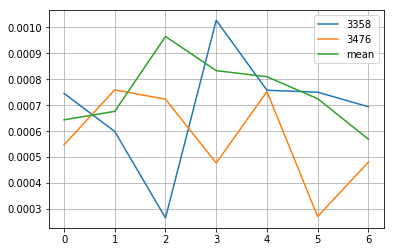

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.xticks(weeks)
plt.plot(weeks, week_CTR_3358, label = '3358')
plt.plot(weeks, week_CTR_3476, label = '3476')
plt.plot(weeks, week_CTR_mean, label = 'mean')
plt.legend(loc='upper right')
plt.grid()
plt.show()

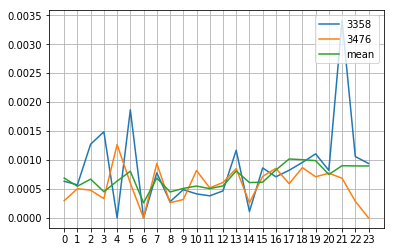

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.xticks(hours)
plt.plot(hours, hour_CTR_3358, label = '3358')
plt.plot(hours, hour_CTR_3476, label = '3476')
plt.plot(hours, hour_CTR_mean, label = 'mean')
plt.legend(loc='upper right')
plt.grid()
plt.show()

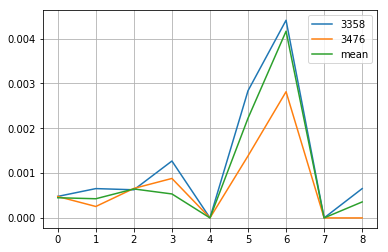

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8], browser_CTR_3358, label = '3358')
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8], browser_CTR_3476, label = '3476')
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8], browser_CTR_mean, label = 'mean')
plt.legend(loc='upper right')
plt.grid()
plt.show()

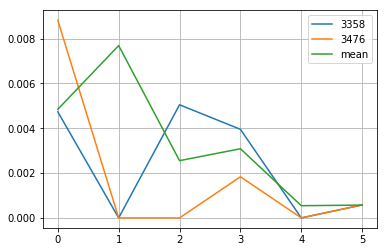

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.xticks([0, 1, 2, 3, 4, 5])
plt.plot([0, 1, 2, 3, 4, 5], os_CTR_3358, label = '3358')
plt.plot([0, 1, 2, 3, 4, 5], os_CTR_3476, label = '3476')
plt.plot([0, 1, 2, 3, 4, 5], os_CTR_mean, label = 'mean')
plt.legend(loc='upper right')
plt.grid()
plt.show()

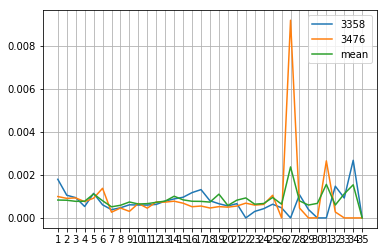

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], region_CTR_3358, label = '3358')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], region_CTR_3476, label = '3476')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], region_CTR_mean, label = 'mean')
plt.legend(loc='upper right')
plt.grid()
plt.show()

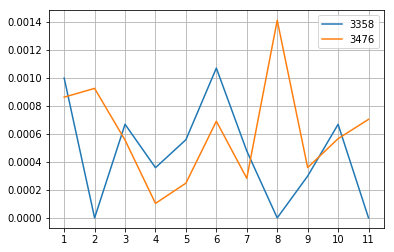

In [42]:
plt.figure()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.plot([1,2,3,4,5,6,7,8,9,10,11], size_CTR_3358, label = '3358')
plt.plot([1,2,3,4,5,6,7,8,9,10,11], size_CTR_3476, label = '3476')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
payprice_week = df.groupby('weekday')['payprice'].sum()/df.groupby('weekday')['weekday'].agg('count')
bidprice_week = df.groupby('weekday')['bidprice'].sum()/df.groupby('weekday')['weekday'].agg('count')

payprice_hour = df.groupby('hour')['payprice'].sum()/df.groupby('hour')['hour'].agg('count')
bidprice_hour = df.groupby('hour')['bidprice'].sum()/df.groupby('hour')['hour'].agg('count')

payprice_region = df.groupby('region')['payprice'].sum()/df.groupby('region')['region'].agg('count')
bidprice_region = df.groupby('region')['bidprice'].sum()/df.groupby('region')['region'].agg('count')

payprice_size = df.groupby('size')['payprice'].sum()/df.groupby('size')['size'].agg('count')
bidprice_size = df.groupby('size')['bidprice'].sum()/df.groupby('size')['size'].agg('count')



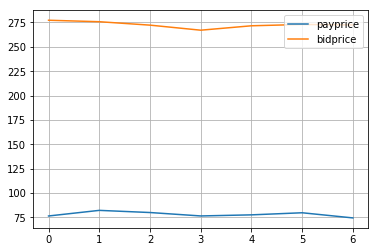

In [29]:
plt.figure()
plt.xticks(weeks)
plt.plot(weeks, payprice_week, label = 'payprice')
plt.plot(weeks, bidprice_week, label = 'bidprice')
plt.legend(loc='upper right')
plt.grid()
plt.show()

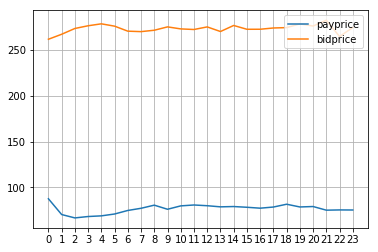

In [30]:
plt.figure()
plt.xticks(hours)
plt.plot(hours, payprice_hour, label = 'payprice')
plt.plot(hours, bidprice_hour, label = 'bidprice')
plt.legend(loc='upper right')
plt.grid()
plt.show()

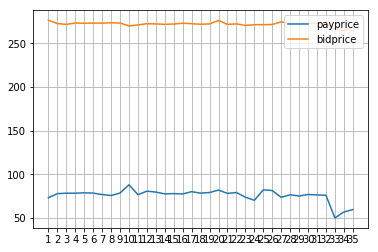

In [31]:
plt.figure()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], payprice_region, label = 'payprice')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], bidprice_region, label = 'bidprice')
plt.legend(loc='upper right')
plt.grid()
plt.show()

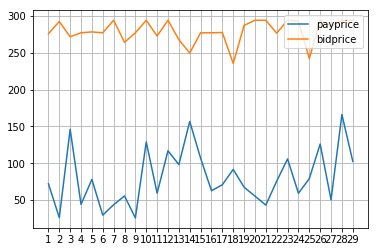

In [43]:
plt.figure()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], payprice_size, label = 'payprice')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], bidprice_size, label = 'bidprice')
plt.legend(loc='upper right')
plt.grid()
plt.show()